# FFT - Multi-Dimensional (2D and 3D)
- **Purpose**: Fourier transform for images and multi-dimensional data
- **scipy.fft**: fft2, ifft2, fftn, ifftn for N-dimensional transforms
- **Applications**: Image processing, compression, filtering, pattern recognition

Key concepts:
- **2D FFT**: Transform images to frequency domain
- **DC component**: Average intensity (center or corner)
- **Low frequencies**: Smooth regions, overall structure
- **High frequencies**: Edges, details, noise

Real examples:
- Image compression (JPEG uses DCT, similar to FFT)
- Blur and sharpen filters
- Pattern detection
- Noise removal

In [1]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Multi-dimensional FFT module loaded")

Multi-dimensional FFT module loaded


## 2D FFT Basics

**2D Discrete Fourier Transform**:
\[ F(u,v) = \sum_{x=0}^{M-1}\sum_{y=0}^{N-1} f(x,y) e^{-i2\pi(ux/M + vy/N)} \]

Where:
- f(x,y) = image pixels (spatial domain)
- F(u,v) = frequency components
- (u,v) = frequency coordinates

**Interpretation**:
- **Low frequencies** (center after fftshift): Smooth variations, overall brightness
- **High frequencies** (edges): Fine details, edges, texture
- **Magnitude**: Shows which frequencies are present
- **Phase**: Encodes spatial information

**Functions**:
```python
fft.fft2(image)   # 2D FFT
fft.ifft2(F)      # 2D Inverse FFT
fft.fftshift(F)   # Move DC to center
```

2D FFT of Gaussian Blob
  Image size: 128×128
  Image max value: 0.9990
  Image min value: 0.0000

FFT DC component (center): 1583.29-0.00j
DC = sum of all pixels ≈ 1583.29


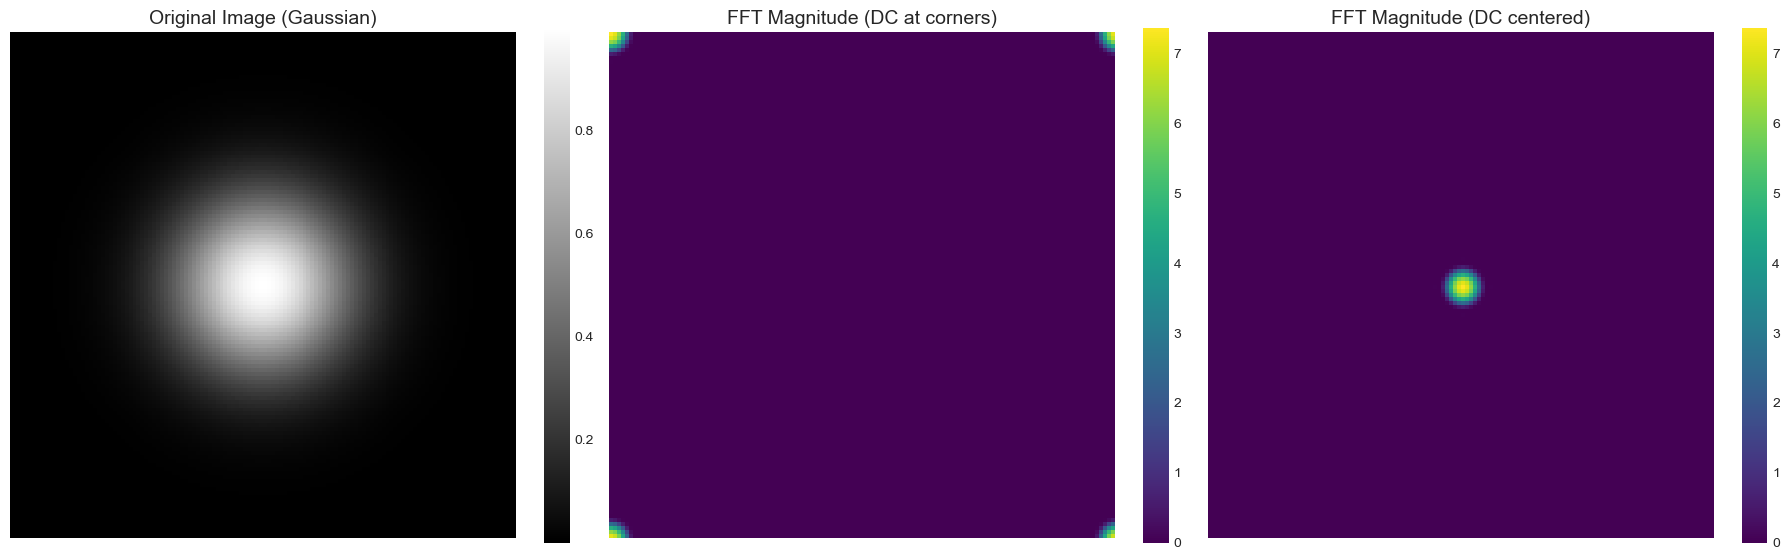


Smooth Gaussian → Low frequencies concentrated at center


In [2]:
# Create simple 2D pattern
size = 128
x = np.linspace(-4, 4, size)
y = np.linspace(-4, 4, size)
X, Y = np.meshgrid(x, y)

# Gaussian blob (smooth, low frequency)
image = np.exp(-(X**2 + Y**2) / 2)

# 2D FFT
fft_result = fft.fft2(image)

# Shift DC component to center
fft_shifted = fft.fftshift(fft_result)

# Magnitude spectrum (log scale for visualization)
magnitude = np.abs(fft_shifted)
magnitude_log = np.log1p(magnitude)  # log(1 + magnitude)

print("2D FFT of Gaussian Blob")
print(f"  Image size: {size}×{size}")
print(f"  Image max value: {image.max():.4f}")
print(f"  Image min value: {image.min():.4f}")
print(f"\nFFT DC component (center): {fft_shifted[size//2, size//2]:.2f}")
print(f"DC = sum of all pixels ≈ {image.sum():.2f}")

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original image
im1 = axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image (Gaussian)', fontsize=14)
axes[0].axis('off')
plt.colorbar(im1, ax=axes[0], fraction=0.046)

# FFT magnitude (not shifted)
im2 = axes[1].imshow(np.log1p(np.abs(fft_result)), cmap='viridis')
axes[1].set_title('FFT Magnitude (DC at corners)', fontsize=14)
axes[1].axis('off')
plt.colorbar(im2, ax=axes[1], fraction=0.046)

# FFT magnitude (shifted)
im3 = axes[2].imshow(magnitude_log, cmap='viridis')
axes[2].set_title('FFT Magnitude (DC centered)', fontsize=14)
axes[2].axis('off')
plt.colorbar(im3, ax=axes[2], fraction=0.046)

plt.tight_layout()
plt.show()

print("\nSmooth Gaussian → Low frequencies concentrated at center")

## Example: Image with Edges

**Edges** contain high-frequency components

**Test**: Square image
- Smooth interior (low freq)
- Sharp edges (high freq)

**FFT should show**:
- Strong DC component (average)
- High frequency components along axes (horizontal/vertical edges)

2D FFT of Square Image
  Image size: 256×256
  Square region: 64:192 (128×128 pixels)
  Fill value: 1.0

Square has sharp edges → high frequencies present


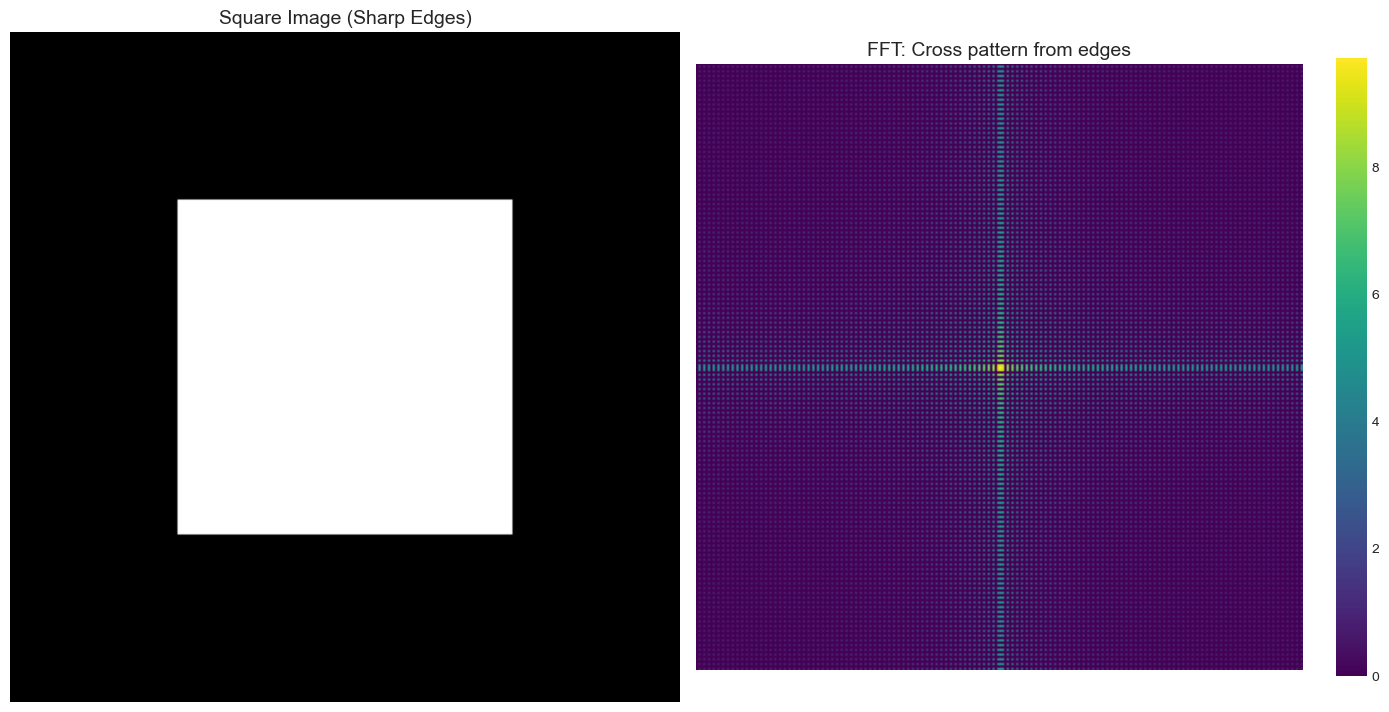


Cross pattern in FFT: Horizontal/vertical edges create frequencies along axes


In [3]:
# Create square image
size = 256
image_square = np.zeros((size, size))
image_square[64:192, 64:192] = 1.0  # White square on black background

# 2D FFT
fft_square = fft.fft2(image_square)
fft_square_shifted = fft.fftshift(fft_square)
magnitude_square = np.log1p(np.abs(fft_square_shifted))

print("2D FFT of Square Image")
print(f"  Image size: {size}×{size}")
print(f"  Square region: 64:192 (128×128 pixels)")
print(f"  Fill value: 1.0")
print(f"\nSquare has sharp edges → high frequencies present")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Original
axes[0].imshow(image_square, cmap='gray')
axes[0].set_title('Square Image (Sharp Edges)', fontsize=14)
axes[0].axis('off')

# FFT
im = axes[1].imshow(magnitude_square, cmap='viridis')
axes[1].set_title('FFT: Cross pattern from edges', fontsize=14)
axes[1].axis('off')
plt.colorbar(im, ax=axes[1], fraction=0.046)

plt.tight_layout()
plt.show()

print("\nCross pattern in FFT: Horizontal/vertical edges create frequencies along axes")

## Low-Pass Filter (Blur)

**Goal**: Remove high frequencies → smooth/blur image

**Method**:
1. FFT to frequency domain
2. Create circular mask (keep only low frequencies)
3. Multiply FFT by mask
4. IFFT back to spatial domain

**Cutoff radius**: Frequencies beyond this are removed

**Effect**: Blur, smooth, denoise

Low-Pass Filtering (Blur)
  Image size: 256×256
  Cutoff radius: 30 pixels
  Effect: Keeps 4.3% of frequencies


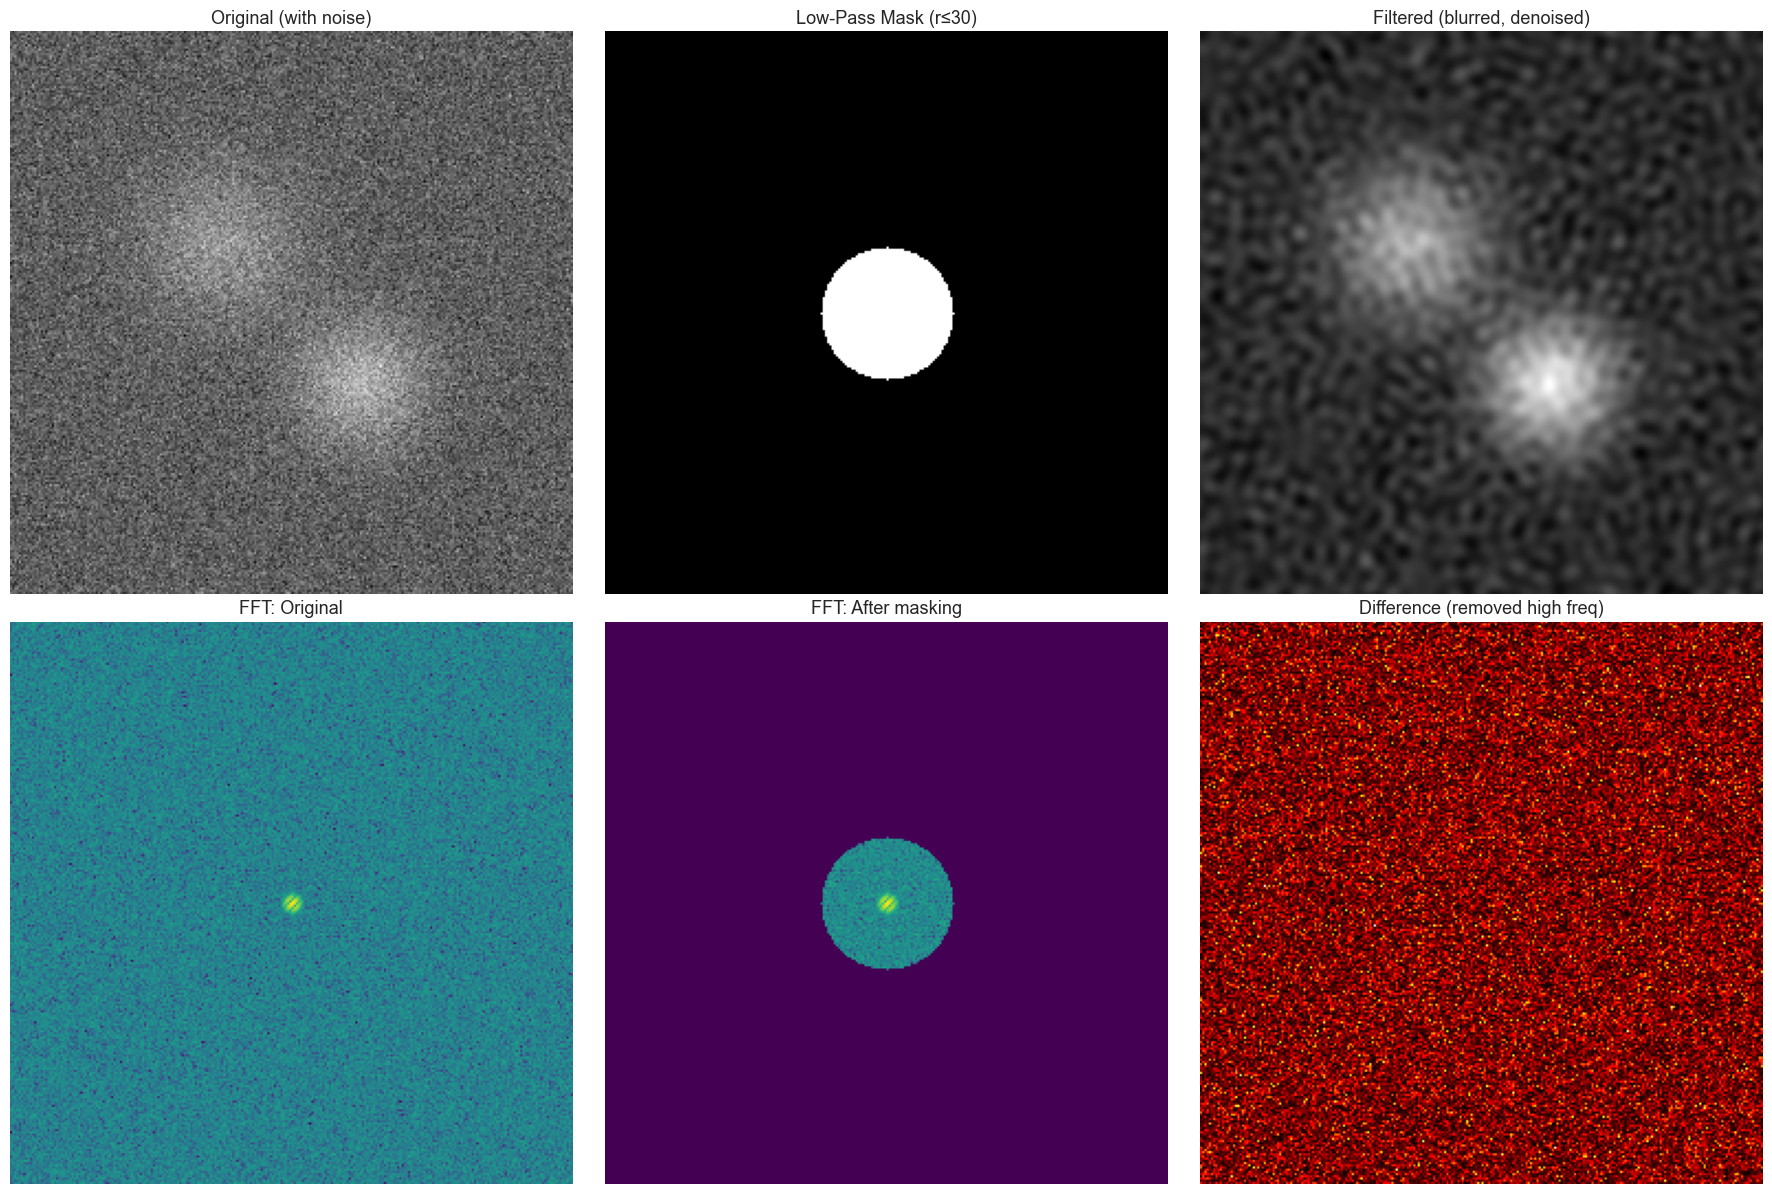


Low-pass filter removes noise and fine details → smoother image


In [4]:
# Create test image with detail
size = 256
x = np.linspace(-2, 2, size)
y = np.linspace(-2, 2, size)
X, Y = np.meshgrid(x, y)

# Multiple Gaussians + noise
image_detailed = (np.exp(-((X-0.5)**2 + (Y-0.5)**2) / 0.2) +
                  0.7*np.exp(-((X+0.5)**2 + (Y+0.5)**2) / 0.3) +
                  0.3*np.random.randn(size, size))  # Noise

# FFT
fft_img = fft.fftshift(fft.fft2(image_detailed))

# Create circular low-pass filter
center = size // 2
Y_idx, X_idx = np.ogrid[:size, :size]
radius = np.sqrt((X_idx - center)**2 + (Y_idx - center)**2)

cutoff_radius = 30  # Keep only frequencies within this radius
mask = radius <= cutoff_radius

# Apply filter
fft_filtered = fft_img * mask

# IFFT
image_filtered = np.real(fft.ifft2(fft.ifftshift(fft_filtered)))

print("Low-Pass Filtering (Blur)")
print(f"  Image size: {size}×{size}")
print(f"  Cutoff radius: {cutoff_radius} pixels")
print(f"  Effect: Keeps {100*mask.sum()/mask.size:.1f}% of frequencies")

# Plot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Row 1: Images
axes[0,0].imshow(image_detailed, cmap='gray')
axes[0,0].set_title('Original (with noise)', fontsize=13)
axes[0,0].axis('off')

axes[0,1].imshow(mask, cmap='gray')
axes[0,1].set_title(f'Low-Pass Mask (r≤{cutoff_radius})', fontsize=13)
axes[0,1].axis('off')

axes[0,2].imshow(image_filtered, cmap='gray')
axes[0,2].set_title('Filtered (blurred, denoised)', fontsize=13)
axes[0,2].axis('off')

# Row 2: FFT magnitude
axes[1,0].imshow(np.log1p(np.abs(fft_img)), cmap='viridis')
axes[1,0].set_title('FFT: Original', fontsize=13)
axes[1,0].axis('off')

axes[1,1].imshow(np.log1p(np.abs(fft_img * mask)), cmap='viridis')
axes[1,1].set_title('FFT: After masking', fontsize=13)
axes[1,1].axis('off')

# Difference
diff = np.abs(image_detailed - image_filtered)
axes[1,2].imshow(diff, cmap='hot')
axes[1,2].set_title('Difference (removed high freq)', fontsize=13)
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

print("\nLow-pass filter removes noise and fine details → smoother image")

## High-Pass Filter (Sharpen/Edge Detection)

**Goal**: Keep high frequencies → emphasize edges and details

**Method**: Opposite of low-pass
1. FFT to frequency domain
2. Remove low frequencies (inverse mask)
3. IFFT back

**Effect**: Edge detection, sharpening, detail enhancement

**Note**: Amplifies noise!

High-Pass Filtering (Edge Detection)
  Cutoff radius: 30 pixels
  Effect: Removes 4.3% of frequencies
  Keeps only edges and fine details


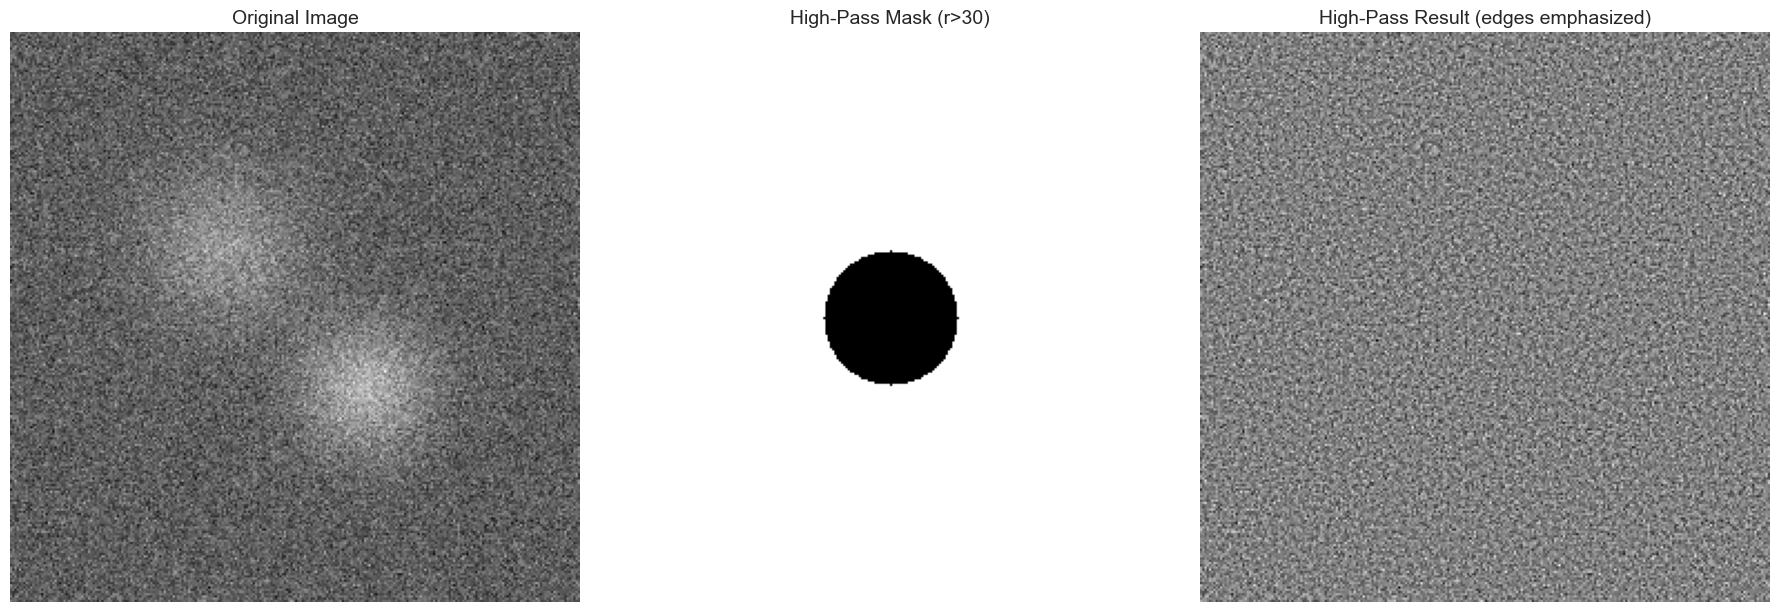


High-pass filter extracts edges and fine details!


In [5]:
# Use same detailed image from before
# Create high-pass filter (opposite of low-pass)
mask_highpass = ~mask  # Invert the low-pass mask

# Apply high-pass filter
fft_highpass = fft_img * mask_highpass
image_highpass = np.real(fft.ifft2(fft.ifftshift(fft_highpass)))

print("High-Pass Filtering (Edge Detection)")
print(f"  Cutoff radius: {cutoff_radius} pixels")
print(f"  Effect: Removes {100*mask.sum()/mask.size:.1f}% of frequencies")
print(f"  Keeps only edges and fine details")

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(image_detailed, cmap='gray')
axes[0].set_title('Original Image', fontsize=14)
axes[0].axis('off')

axes[1].imshow(mask_highpass, cmap='gray')
axes[1].set_title(f'High-Pass Mask (r>{cutoff_radius})', fontsize=14)
axes[1].axis('off')

axes[2].imshow(image_highpass, cmap='gray')
axes[2].set_title('High-Pass Result (edges emphasized)', fontsize=14)
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("\nHigh-pass filter extracts edges and fine details!")

## Image Compression via FFT

**Idea**: Keep only largest magnitude frequencies

**Method**:
1. FFT
2. Keep top K% of coefficients (by magnitude)
3. Set rest to zero
4. IFFT

**Compression ratio**: (1 - K/100)

**Similar to JPEG**: Uses DCT (Discrete Cosine Transform), a variant of FFT

**Trade-off**: Higher compression → more artifacts

Image Compression via FFT
Original size: 128×128 = 16384 coefficients

Keep 10% of coefficients:
  Coefficients kept: 1639/16384
  Compression: 90.0%
  PSNR: 99.0 dB

Keep 5% of coefficients:
  Coefficients kept: 820/16384
  Compression: 95.0%
  PSNR: 76.3 dB

Keep 1% of coefficients:
  Coefficients kept: 164/16384
  Compression: 99.0%
  PSNR: 60.9 dB



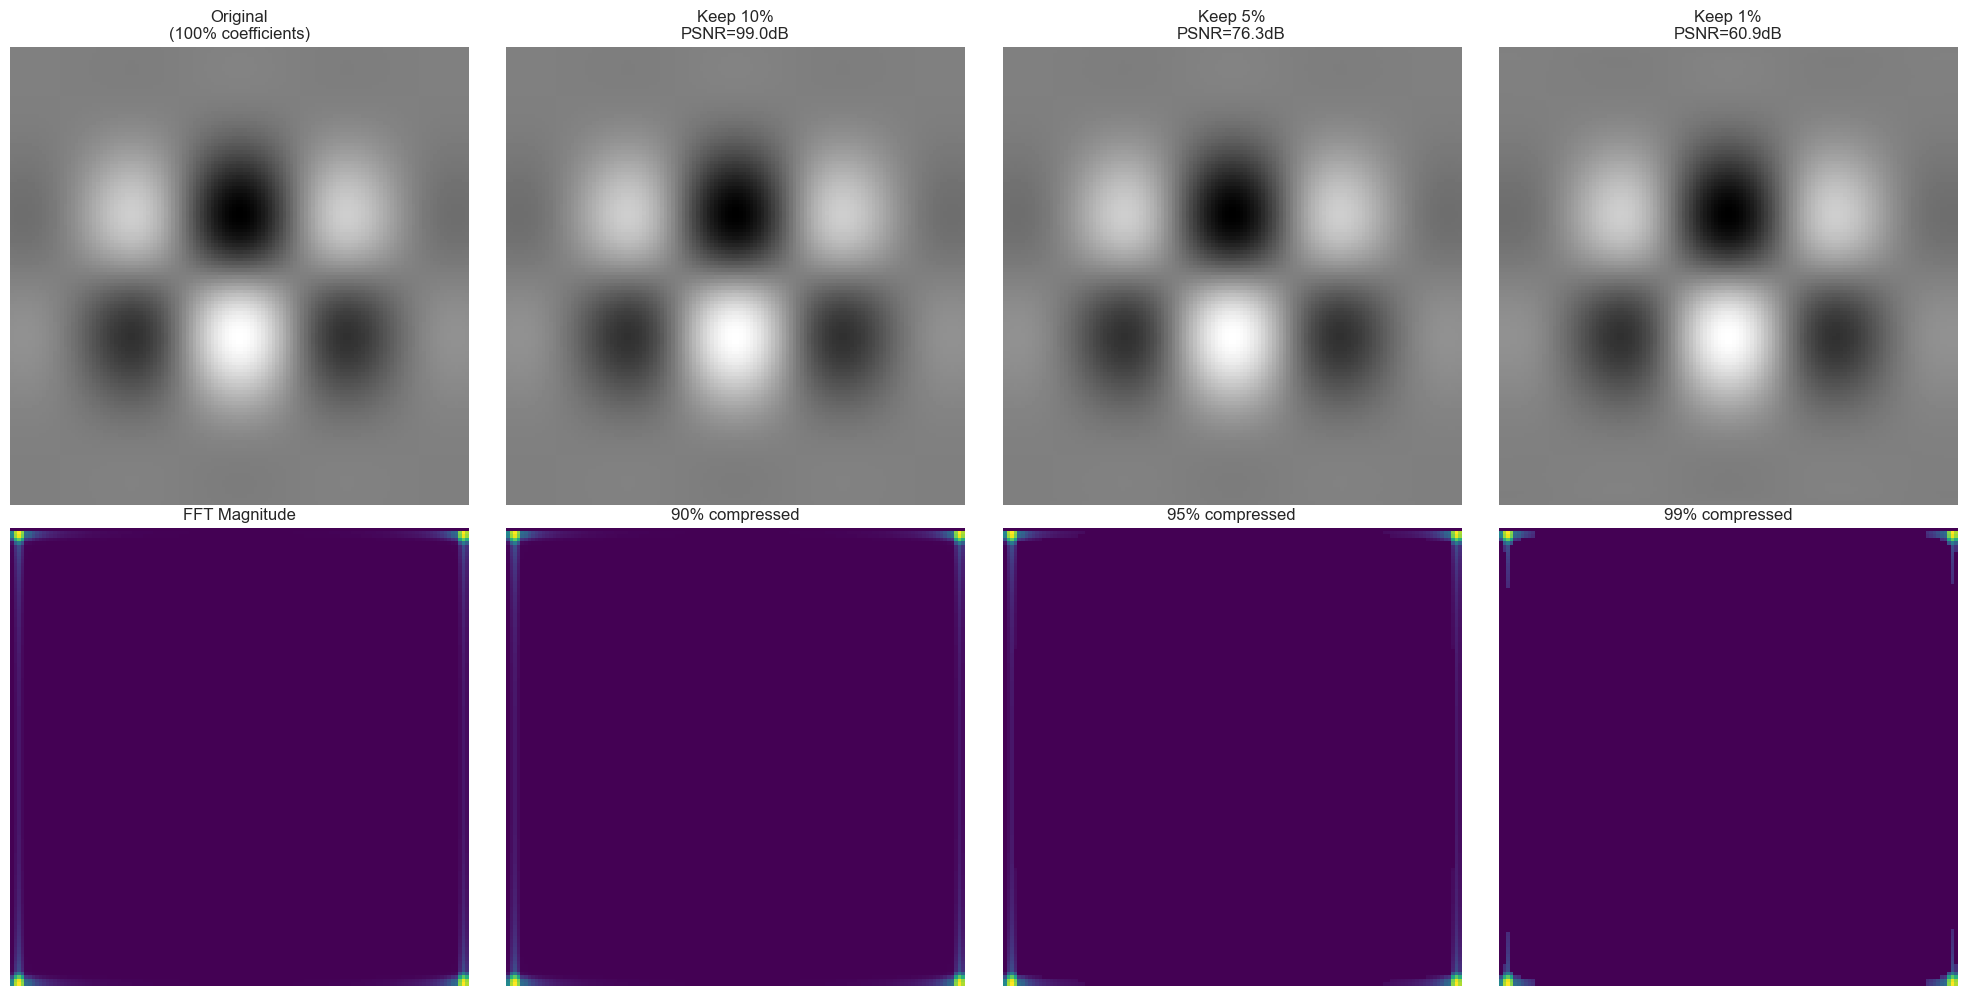

Even with 99% compression (keep 1%), image is recognizable!


In [6]:
# Create test image
size = 128
x = np.linspace(-2, 2, size)
y = np.linspace(-2, 2, size)
X, Y = np.meshgrid(x, y)

# Image with smooth gradients
image_orig = np.exp(-(X**2/2 + Y**2/1)) * np.cos(3*X) * np.sin(2*Y)

# FFT
fft_orig = fft.fft2(image_orig)
magnitude = np.abs(fft_orig)

# Test different compression levels
keep_percentages = [10, 5, 1]

fig, axes = plt.subplots(2, len(keep_percentages)+1, figsize=(20, 10))

# Original
axes[0,0].imshow(image_orig, cmap='gray')
axes[0,0].set_title('Original\n(100% coefficients)', fontsize=12)
axes[0,0].axis('off')

axes[1,0].imshow(np.log1p(magnitude), cmap='viridis')
axes[1,0].set_title('FFT Magnitude', fontsize=12)
axes[1,0].axis('off')

print("Image Compression via FFT")
print(f"Original size: {size}×{size} = {size**2} coefficients\n")

for i, keep_pct in enumerate(keep_percentages, 1):
    # Threshold: keep only top K% by magnitude
    threshold = np.percentile(magnitude, 100 - keep_pct)
    fft_compressed = fft_orig.copy()
    fft_compressed[magnitude < threshold] = 0
    
    # Reconstruct
    image_compressed = np.real(fft.ifft2(fft_compressed))
    
    # Error
    mse = np.mean((image_orig - image_compressed)**2)
    psnr = 10 * np.log10(1 / mse) if mse > 0 else float('inf')
    
    num_kept = np.sum(magnitude >= threshold)
    compression_ratio = 100 * (1 - num_kept / magnitude.size)
    
    print(f"Keep {keep_pct}% of coefficients:")
    print(f"  Coefficients kept: {num_kept}/{magnitude.size}")
    print(f"  Compression: {compression_ratio:.1f}%")
    print(f"  PSNR: {psnr:.1f} dB\n")
    
    # Plot
    axes[0,i].imshow(image_compressed, cmap='gray')
    axes[0,i].set_title(f'Keep {keep_pct}%\nPSNR={psnr:.1f}dB', fontsize=12)
    axes[0,i].axis('off')
    
    axes[1,i].imshow(np.log1p(np.abs(fft_compressed)), cmap='viridis')
    axes[1,i].set_title(f'{compression_ratio:.0f}% compressed', fontsize=12)
    axes[1,i].axis('off')

plt.tight_layout()
plt.show()

print("Even with 99% compression (keep 1%), image is recognizable!")

## N-Dimensional FFT

**For 3D and higher**: `fft.fftn()` and `fft.ifftn()`

**Applications**:
- 3D medical imaging (CT, MRI)
- Video processing (time + 2D space)
- Volumetric data analysis
- Multi-dimensional signal processing

**Syntax**:
```python
fft.fftn(data, axes=None)   # N-D FFT
fft.ifftn(data, axes=None)  # N-D Inverse FFT
```

3D FFT Example
  Data shape: (32, 32, 32)
  FFT shape: (32, 32, 32)
  Max magnitude: 6.51e+03

Visualize central slices:


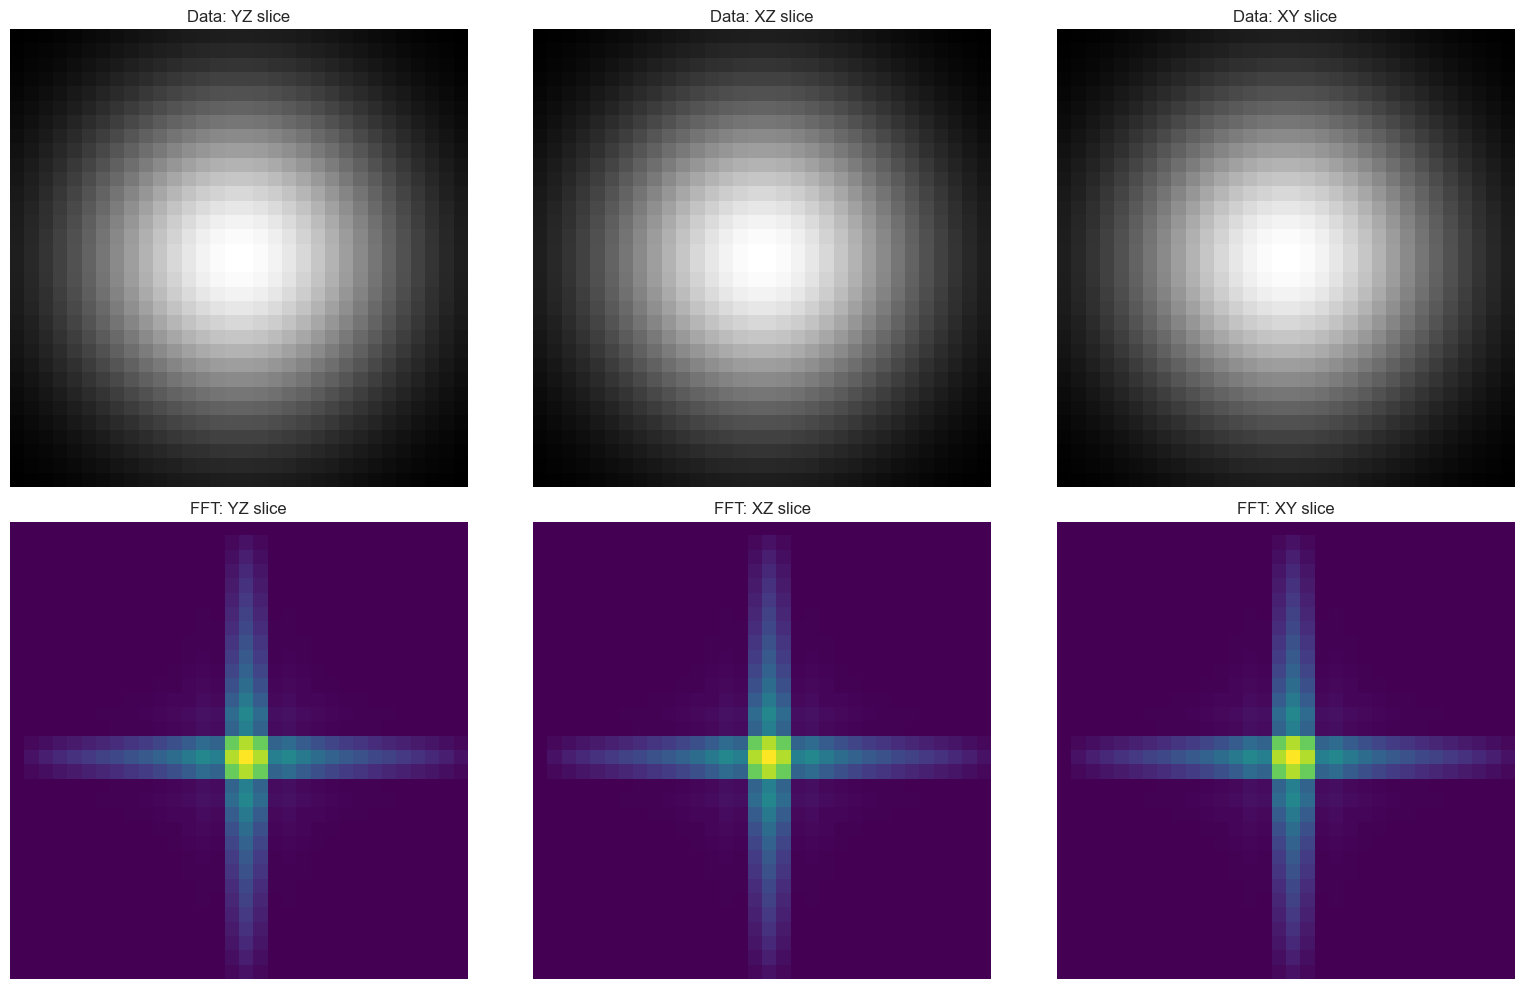


3D Gaussian → Spherically symmetric FFT (also Gaussian)


In [7]:
# Create 3D data (e.g., volumetric)
size = 32
x = np.linspace(-2, 2, size)
y = np.linspace(-2, 2, size)
z = np.linspace(-2, 2, size)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# 3D Gaussian
data_3d = np.exp(-(X**2 + Y**2 + Z**2) / 2)

# 3D FFT
fft_3d = fft.fftn(data_3d)

# Magnitude
magnitude_3d = np.abs(fft_3d)

print("3D FFT Example")
print(f"  Data shape: {data_3d.shape}")
print(f"  FFT shape: {fft_3d.shape}")
print(f"  Max magnitude: {magnitude_3d.max():.2e}")
print(f"\nVisualize central slices:")

# Plot central slices
center = size // 2

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Original data slices
axes[0,0].imshow(data_3d[center, :, :], cmap='gray')
axes[0,0].set_title('Data: YZ slice', fontsize=12)
axes[0,0].axis('off')

axes[0,1].imshow(data_3d[:, center, :], cmap='gray')
axes[0,1].set_title('Data: XZ slice', fontsize=12)
axes[0,1].axis('off')

axes[0,2].imshow(data_3d[:, :, center], cmap='gray')
axes[0,2].set_title('Data: XY slice', fontsize=12)
axes[0,2].axis('off')

# FFT magnitude slices (log scale)
fft_shifted = fft.fftshift(fft_3d)
mag_log = np.log1p(np.abs(fft_shifted))

axes[1,0].imshow(mag_log[center, :, :], cmap='viridis')
axes[1,0].set_title('FFT: YZ slice', fontsize=12)
axes[1,0].axis('off')

axes[1,1].imshow(mag_log[:, center, :], cmap='viridis')
axes[1,1].set_title('FFT: XZ slice', fontsize=12)
axes[1,1].axis('off')

axes[1,2].imshow(mag_log[:, :, center], cmap='viridis')
axes[1,2].set_title('FFT: XY slice', fontsize=12)
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

print("\n3D Gaussian → Spherically symmetric FFT (also Gaussian)")

## Summary

### Key Functions:

```python
# 2D
fft.fft2(image)       # 2D forward FFT
fft.ifft2(F)          # 2D inverse FFT
fft.fftshift(F)       # Move DC to center
fft.ifftshift(F)      # Undo shift

# N-D
fft.fftn(data)        # N-D FFT
fft.ifftn(F)          # N-D inverse
```

### Frequency Interpretation:

✓ **Low frequencies** (center): Smooth variations, overall structure  
✓ **High frequencies** (edges): Details, edges, noise  
✓ **DC component**: Average value (zero frequency)  
✓ **Magnitude**: |F| shows which frequencies present  
✓ **Phase**: Encodes spatial arrangement  

### Applications:

- **Low-pass filter**: Blur, denoise, smooth
- **High-pass filter**: Sharpen, edge detection
- **Compression**: Keep only important frequencies
- **Analysis**: Identify patterns, periodicities
- **Convolution**: Multiplication in frequency domain

### Typical Workflow:

1. **Transform**: image → FFT → frequency domain
2. **Modify**: Apply filter, compress, analyze
3. **Transform back**: IFFT → modified image